# Movie Recommendation System

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
# Changing Plot style
sns.set_style('white')

In [3]:
# Avoid warnings
warnings.filterwarnings('ignore')

## Loading data

In [4]:
# Setting column names
columns_name = ['user_id','item_id','Rating','Timestamp']

# Reading csv file
df = pd.read_csv("u.data",sep='\t',names = columns_name)

In [5]:
# Print first five rows 
df.head()

,user_id,item_id,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
# Shape of Dataframe
df.shape

(100000, 4)

In [7]:
# Checking for Null Values
df.isnull().any()

user_id      False
item_id      False
Rating       False
Timestamp    False
dtype: bool

In [8]:
# Loading file containing movie titles
item = pd.read_csv("u.item",sep='\|',header=None)

movie_titles = item[[0,1]]

In [9]:
movie_titles.nunique()

0    1682
1    1664
dtype: int64

In [10]:
movie_titles.columns = ['item_id','title']

In [11]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


# Final Dataset

In [12]:
# Merging Df
data = pd.merge(df,movie_titles,on='item_id')

In [13]:
# Printing first five Rows
data.head()

,user_id,item_id,Rating,Timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


# Exploratory Data Analysis (EDA)

In [14]:
# General Stats about Dataset
data.describe()

,user_id,item_id,Rating,Timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


In [15]:
# Checking if there exists any null value
data.isnull().any()

user_id      False
item_id      False
Rating       False
Timestamp    False
title        False
dtype: bool

In [16]:
# Unique Users / Count of Users
data['user_id'].nunique()

943

In [17]:
# Unique Movies / Count of Unique Movies
data['item_id'].nunique()

1682

In [18]:
# Count of Movies having Rating higher than 4
data[data['Rating'] > 4].count()[1]

21201

In [19]:
# Finding Mean Rating of All Movies
Ratings = data.groupby('title').mean()

Ratings.drop(columns=['user_id','item_id','Timestamp'],axis=1,inplace=True)

Ratings.head(20)

,Rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390
2 Days in the Valley (1996),3.225806
"20,000 Leagues Under the Sea (1954)",3.500000
2001: A Space Odyssey (1968),3.969112
3 Ninjas: High Noon At Mega Mountain (1998),1.000000


In [20]:
# Movies with Highest Average Rating
Ratings['Rating'].sort_values(ascending=False).head(10)

title
Marlene Dietrich: Shadow and Light (1996)            5.0
Prefontaine (1997)                                   5.0
Santa with Muscles (1996)                            5.0
Star Kid (1997)                                      5.0
Someone Else's America (1995)                        5.0
Entertaining Angels: The Dorothy Day Story (1996)    5.0
Saint of Fort Washington, The (1993)                 5.0
Great Day in Harlem, A (1994)                        5.0
They Made Me a Criminal (1939)                       5.0
Aiqing wansui (1994)                                 5.0
Name: Rating, dtype: float64

#### It maybe possible for a movie that has been rated 5.0 stars ,that not many users have reviewed that movie on an average. 
#### Hence we need to check the count of users corresponding to the average rating for a particular movie.

In [21]:
# Adding a new column to the dataframe that contains count of users corresponding to a average ratings for a movie
Ratings['Count_ratings'] = data.groupby('title').count()['Rating']

In [22]:
# Sorting values of count_ratings column in descending order
Ratings.sort_values(by='Count_ratings',ascending=False).head(10)

,Rating,Count_ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


#### Therefore Star Wars is the highest rated movie

In [23]:
# Ratings for a Movie that have been rated five stars along with Count of Reviews 
# Sorting by average rating 
Ratings.sort_values(by='Rating',ascending=False).head(10)

,Rating,Count_ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
"Great Day in Harlem, A (1994)",5.0,1
Aiqing wansui (1994),5.0,1
Santa with Muscles (1996),5.0,2
Prefontaine (1997),5.0,3


### Hence we conclude that movies that have an average rating of 5 out of 5 have been rated by a very less fraction of Users

#### Plotting a histogram 

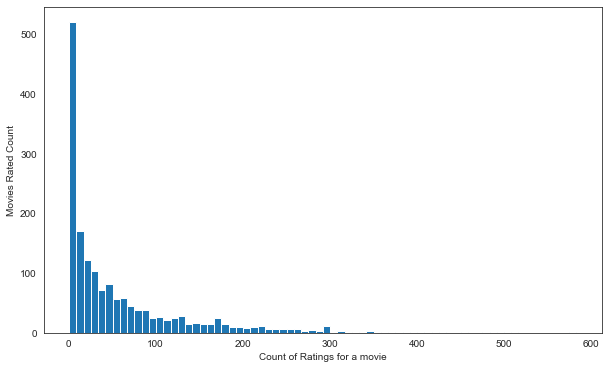

In [24]:
plt.figure(figsize=(10,6))

plt.hist(Ratings['Count_ratings'],bins=70)

plt.xlabel('Count of Ratings for a movie')

plt.ylabel('Movies Rated Count')

plt.show()
# Starting Movies are not relevant as they are watched/rated by few people only.

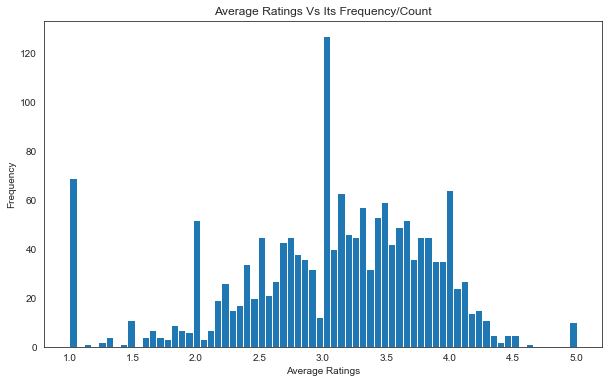

In [25]:
plt.figure(figsize=(10,6))

plt.hist(Ratings['Rating'],bins=70)

plt.xlabel('Average Ratings')

plt.title('Average Ratings Vs Its Frequency/Count')

plt.ylabel('Frequency')

plt.show()
# Normal Distribution with mean = 3

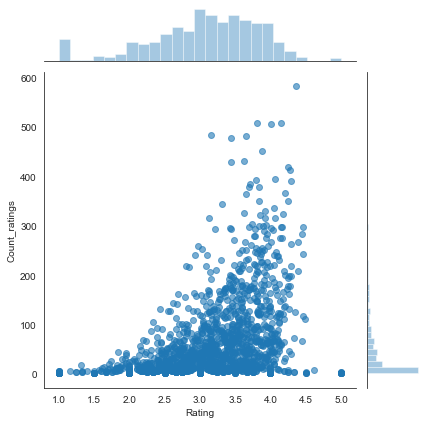

In [26]:
sns.jointplot(x='Rating',y='Count_ratings',data=Ratings,alpha=0.6)

# Movie Recommendation

In [27]:
# Reviewing Dataset
data.head()

,user_id,item_id,Rating,Timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [28]:
# Creating a new dataframe that stores ratings for different movies by an individual user
moviemat = data.pivot_table(index='user_id',columns='title',values='Rating')

In [29]:
moviemat.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
#moviemat.isnull().any()

In [30]:
# Analysing for most grossing movie
starwarsR = moviemat['Star Wars (1977)']
starwarsR.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [31]:
# Correlating Star Wars movie with other movies
CorrWStarWars = moviemat.corrwith(starwarsR)
CorrWStarWars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [32]:
# Creating dataframe that stores correlation values of movies with the most grossing movie(Star Wars)
corr_starWars = pd.DataFrame(data = CorrWStarWars,columns=['Correlation'])

In [33]:
corr_starWars.head(10)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [34]:
# Dropping Null Values
corr_starWars.dropna(inplace=True)

In [35]:
corr_starWars.head(10)

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
"39 Steps, The (1935)",0.106453


In [36]:
corr_starWars.sort_values(by='Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
"Beans of Egypt, Maine, The (1994)",1.0
Safe Passage (1994),1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0
"Outlaw, The (1943)",1.0
"Line King: Al Hirschfeld, The (1996)",1.0
Hurricane Streets (1998),1.0


In [37]:
# Applying Filtering (Rejecting movies with less reviews)
corr = corr_starWars.join(Ratings['Count_ratings'])
corr.head()

,Correlation,Count_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [38]:
corr[corr['Count_ratings'] > 100].sort_values('Correlation',ascending=False).head(10)

,Correlation,Count_ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


In [ ]:
# Hence the movies which has higher value of Correlation with Star Wars would get recommended to other users.

## Prediction Function

In [ ]:
# Predict/Suggest Movies based on a Movie

In [39]:
def predictmovie(movie_name):
    
    # Analysing for most grossing movie
    movieR = moviemat[movie_name]
    
    # Correlating given movie with other movies
    Corr = moviemat.corrwith(movieR)
    
    # Converting corr array to dataframe and dropping null values
    corr_wmovie = pd.DataFrame(data = Corr,columns=['Correlation'])
    corr_wmovie.dropna(inplace=True)
    
    # Applying Filtering (Rejecting movies with less reviews)
    FinalCorr = corr_wmovie.join(Ratings['Count_ratings'])
    
    #Sorting in decreasing order of Correlation
    predictions = FinalCorr[FinalCorr['Count_ratings'] > 100].sort_values('Correlation',ascending=False)
    
    return predictions

In [40]:
# Top 5 movies recommended to users based on titanic
predictmovie('Titanic (1997)').head(5)

,Correlation,Count_ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
